## 0. Computer Vision Libraries in Pytorch


In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


print(torch.__version__)
print(torchvision.__version__)


2.3.1
0.18.1


## 1. Getting the Dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets

In [2]:
# Set up train data
train_data = datasets.FashionMNIST(
    root='data', #  where to download data
    train=True,
    download=True, # download the dataset
    transform=torchvision.transforms.ToTensor(), # hw do we want to transform the data
    target_transform=None # hw do we want to transform the labels/targets
    
)

test_data = datasets.FashionMNIST(
    root='data', #  where to download data
    train=False,
    download=True, # download the dataset
    transform=ToTensor(), # hw do we want to transform the data
    target_transform=None # hw do we want to transform the labels/targets
    
)


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names, len(class_names)

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 10)

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
image.shape, label # [Color_channel, height, width]

(torch.Size([1, 28, 28]), 9)

### 1.2 Visualize Data

(-0.5, 27.5, 27.5, -0.5)

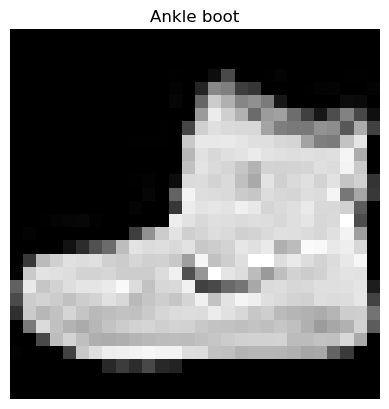

In [8]:

plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

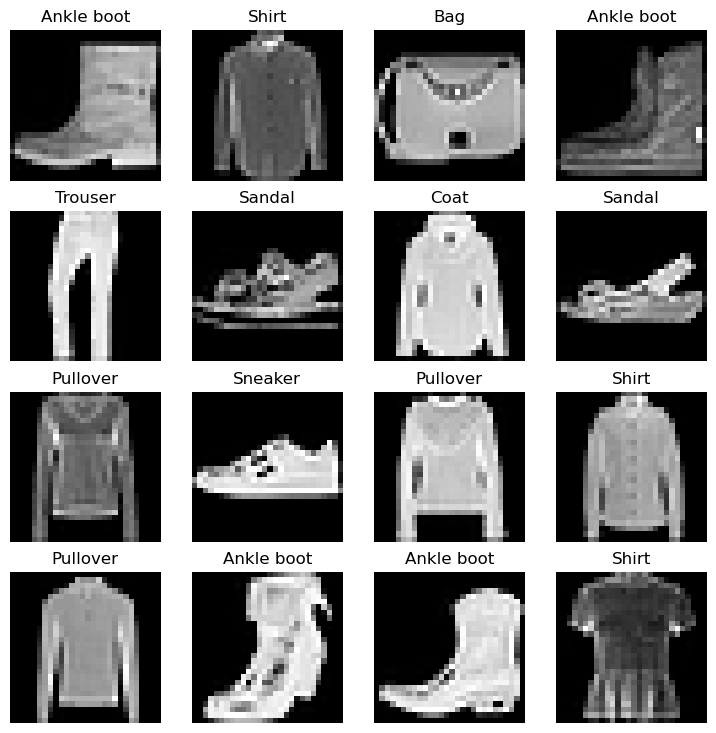

In [9]:
# Plot more images 
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data),size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)
    


## 2. Prepare DataLoader

Our data is in the form of Pytorch datasets.

DataLoader turns our dataset into a Python iterable

More specifically, we want to turn our data into batches (or mini-batches)

Why should we do this

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 10000 images on it. So we break it down to 32 images at a time (batch size of 32)
2. It gives our neural network more chances to update its gradient per epoch. 

In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32 #  number of training examples used in one iteration of the model training process
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x269be35ccd0>,
 <torch.utils.data.dataloader.DataLoader at 0x269be35cf40>)

In [11]:
print(f"Length of train dataloader: {len(train_dataloader)}")
print(f"Length of train test dataloader: {len(test_dataloader)}")

Length of train dataloader: 1875
Length of train test dataloader: 313


In [12]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


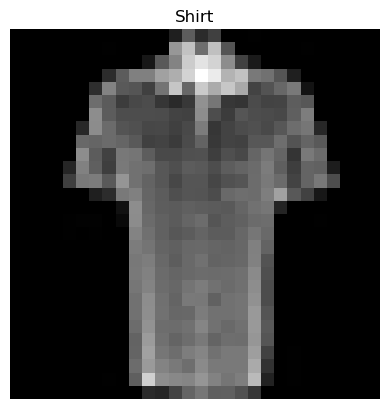

In [13]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")


## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modeling experiments. It's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments

In other words: Start simply & add complexity when necessary

In [14]:
# Create a flatten layer
flatten_model = nn.Flatten()
# Get a single sample
x = train_features_batch[0]
# Flatten the sample 
output = flatten_model(x) # perform forward pass

# Print out what happened 
print(f"Shape before flatteningL: {x.shape}") # [color_channels, height, width]
print(f"Shape after flatteningL: {output.shape}") # [color_channels, height*width]




Shape before flatteningL: torch.Size([1, 28, 28])
Shape after flatteningL: torch.Size([1, 784])


In [15]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape: int, hidden_units:int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    
    def forward(self,x):
        return self.layer_stack(x)


In [16]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names)
).to('cpu')
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)


tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [18]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup Loss, optimizer, Evaluation Metrics

* Loss function - since we're working with multi-class data, our loss funtion will be nn.CrossEntropyLoss()
* Optimizer - our optimizer torch.optim.SGD() (SGD)
* Evaluation metric - we're working classification prob, let's use accuracy as our evaluation metric

In [19]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Set up loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want tro track are:
1. Model's Performance (loss & accuracy values etc)
2. Hw fast it runs 

In [20]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device=None):
    
    """
    Print difference btw start and end time
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [21]:
start_time = timer()
# some code ...
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 seconds


2.6399999999426882e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop thr training batches, perform training steps, calculate the train loss *per batch*
3. Loop thr testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happening
5. Time it all


In [22]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start timer
torch.manual_seed(42)
train_time_start = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    train_loss = 0
    # Add a loop to loop thr the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_preds = model_0(X)
        
        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_preds, y)
        train_loss += loss # accumulate train loss
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
        # Print out result
        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
            
    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)
    
    ### Testing 
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
            
            # 2. Calculate loss
            test_loss += loss_fn(test_pred, y) 
            
            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))   
            
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)
        
        # Devide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)
    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
    
# Calculate training time
train_time_end = timer()
total_train_time = print_train_time(start=train_time_start, end=train_time_end,
                                    device=str(next(model_0.parameters()).device))

c:\Users\ASUS\anaconda3\envs\gp1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:10<00:21, 10.82s/it]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:18<00:09,  9.24s/it]


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:27<00:00,  9.16s/it]


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 27.487 seconds


## 4. Make predictions and get Model results

In [23]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
    '''Returns a dictionary containing the results of model predicting on data_loader'''
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)
            
            # Accumulate the loss and acc values per batch 
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
            
        # Scale loss and acc to find the average the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__, # Only works when model was created with a clas
            "model_loss": loss.item(),
            "model_acc":acc
            }
    
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

100%|██████████| 313/313 [00:00<00:00, 368.06it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU if there is one)



In [24]:
!nvidia-smi

Wed Jan  8 14:54:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.07                 Driver Version: 566.07         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P0             14W /  126W |       0MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [25]:
torch.cuda.is_available()

True

In [26]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Build a better model with non-linearity

In [27]:
# Create a model with non-linear & linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Flatten inputs into a single vector
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )
        
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [28]:
# Create an instance of the model
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the output of the flatten layer
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup Loss, Optimizer & Evaluation metrics

In [29]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # Measure hw wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # Tries to update our model's parameters to reduce the loss
                            lr=0.1)

### 6.3 Functionizing training & evaluation testing loops

In [30]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [31]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer 
train_time_start = timer()

# Set epochs
epochs = 100

# Create an optimization & evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n---------")
    train_step(model=model_1, data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn, device=device)

    test_step(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)
    
train_time_end = timer()
total_train_time = print_train_time(start=train_time_start, end=train_time_end, device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%


  1%|          | 1/100 [00:05<09:43,  5.89s/it]

Test loss: 0.95636 | Test accuracy: 65.00%

Epoch 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%


  2%|▏         | 2/100 [00:11<09:30,  5.82s/it]

Test loss: 0.72227 | Test accuracy: 73.91%

Epoch 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%


  3%|▎         | 3/100 [00:17<09:30,  5.88s/it]

Test loss: 0.68500 | Test accuracy: 75.02%

Epoch 3
---------
Train loss: 0.64384 | Train accuracy: 76.52%


  4%|▍         | 4/100 [00:23<09:33,  5.97s/it]

Test loss: 0.65079 | Test accuracy: 76.13%

Epoch 4
---------
Train loss: 0.62892 | Train accuracy: 77.00%


  5%|▌         | 5/100 [00:29<09:27,  5.97s/it]

Test loss: 0.65277 | Test accuracy: 75.95%

Epoch 5
---------
Train loss: 0.61569 | Train accuracy: 77.43%


  6%|▌         | 6/100 [00:35<09:24,  6.00s/it]

Test loss: 0.64517 | Test accuracy: 76.54%

Epoch 6
---------
Train loss: 0.60672 | Train accuracy: 77.80%


  7%|▋         | 7/100 [00:41<09:15,  5.97s/it]

Test loss: 0.62879 | Test accuracy: 76.67%

Epoch 7
---------
Train loss: 0.47136 | Train accuracy: 83.09%


  8%|▊         | 8/100 [00:47<09:15,  6.04s/it]

Test loss: 0.44768 | Test accuracy: 84.30%

Epoch 8
---------
Train loss: 0.39947 | Train accuracy: 85.96%


  9%|▉         | 9/100 [00:55<10:08,  6.69s/it]

Test loss: 0.44110 | Test accuracy: 84.75%

Epoch 9
---------
Train loss: 0.39380 | Train accuracy: 86.17%


 10%|█         | 10/100 [01:01<09:33,  6.38s/it]

Test loss: 0.43291 | Test accuracy: 84.82%

Epoch 10
---------
Train loss: 0.38916 | Train accuracy: 86.22%


 11%|█         | 11/100 [01:08<09:28,  6.39s/it]

Test loss: 0.44339 | Test accuracy: 84.59%

Epoch 11
---------
Train loss: 0.38361 | Train accuracy: 86.42%


 12%|█▏        | 12/100 [01:14<09:36,  6.55s/it]

Test loss: 0.47821 | Test accuracy: 83.13%

Epoch 12
---------
Train loss: 0.38096 | Train accuracy: 86.47%


 13%|█▎        | 13/100 [01:21<09:27,  6.53s/it]

Test loss: 0.43126 | Test accuracy: 84.62%

Epoch 13
---------
Train loss: 0.37779 | Train accuracy: 86.52%


 14%|█▍        | 14/100 [01:30<10:29,  7.32s/it]

Test loss: 0.45434 | Test accuracy: 84.79%

Epoch 14
---------
Train loss: 0.37323 | Train accuracy: 86.74%


 15%|█▌        | 15/100 [01:37<10:04,  7.11s/it]

Test loss: 0.45263 | Test accuracy: 83.64%

Epoch 15
---------
Train loss: 0.37423 | Train accuracy: 86.63%


 16%|█▌        | 16/100 [01:43<09:31,  6.80s/it]

Test loss: 0.47568 | Test accuracy: 84.04%

Epoch 16
---------
Train loss: 0.37039 | Train accuracy: 86.79%


 17%|█▋        | 17/100 [01:49<09:17,  6.71s/it]

Test loss: 0.47781 | Test accuracy: 83.46%

Epoch 17
---------
Train loss: 0.36680 | Train accuracy: 86.91%


 18%|█▊        | 18/100 [01:56<08:59,  6.58s/it]

Test loss: 0.46565 | Test accuracy: 84.17%

Epoch 18
---------
Train loss: 0.36528 | Train accuracy: 86.93%


 19%|█▉        | 19/100 [02:03<09:21,  6.94s/it]

Test loss: 0.45820 | Test accuracy: 84.09%

Epoch 19
---------
Train loss: 0.36344 | Train accuracy: 86.98%


 20%|██        | 20/100 [02:11<09:33,  7.17s/it]

Test loss: 0.43500 | Test accuracy: 84.43%

Epoch 20
---------
Train loss: 0.36001 | Train accuracy: 87.11%


 21%|██        | 21/100 [02:18<09:11,  6.99s/it]

Test loss: 0.43485 | Test accuracy: 84.82%

Epoch 21
---------
Train loss: 0.35846 | Train accuracy: 87.15%


 22%|██▏       | 22/100 [02:25<09:04,  6.99s/it]

Test loss: 0.42237 | Test accuracy: 85.36%

Epoch 22
---------
Train loss: 0.35941 | Train accuracy: 87.20%


 23%|██▎       | 23/100 [02:32<08:56,  6.96s/it]

Test loss: 0.41891 | Test accuracy: 85.12%

Epoch 23
---------
Train loss: 0.35726 | Train accuracy: 87.33%


 24%|██▍       | 24/100 [02:38<08:33,  6.76s/it]

Test loss: 0.42659 | Test accuracy: 85.08%

Epoch 24
---------
Train loss: 0.35500 | Train accuracy: 87.27%


 25%|██▌       | 25/100 [02:44<08:22,  6.70s/it]

Test loss: 0.45903 | Test accuracy: 84.31%

Epoch 25
---------
Train loss: 0.35325 | Train accuracy: 87.28%


 26%|██▌       | 26/100 [02:51<08:07,  6.58s/it]

Test loss: 0.42703 | Test accuracy: 85.20%

Epoch 26
---------
Train loss: 0.35367 | Train accuracy: 87.25%


 27%|██▋       | 27/100 [02:57<07:56,  6.52s/it]

Test loss: 0.43001 | Test accuracy: 84.87%

Epoch 27
---------
Train loss: 0.35186 | Train accuracy: 87.31%


 28%|██▊       | 28/100 [03:04<07:51,  6.55s/it]

Test loss: 0.43560 | Test accuracy: 84.72%

Epoch 28
---------
Train loss: 0.35092 | Train accuracy: 87.36%


 29%|██▉       | 29/100 [03:10<07:45,  6.55s/it]

Test loss: 0.44025 | Test accuracy: 85.12%

Epoch 29
---------
Train loss: 0.34977 | Train accuracy: 87.47%


 30%|███       | 30/100 [03:18<08:00,  6.87s/it]

Test loss: 0.43115 | Test accuracy: 84.99%

Epoch 30
---------
Train loss: 0.34866 | Train accuracy: 87.42%


 31%|███       | 31/100 [03:24<07:42,  6.70s/it]

Test loss: 0.45915 | Test accuracy: 84.72%

Epoch 31
---------
Train loss: 0.34761 | Train accuracy: 87.49%


 32%|███▏      | 32/100 [03:31<07:35,  6.71s/it]

Test loss: 0.43497 | Test accuracy: 85.10%

Epoch 32
---------
Train loss: 0.34561 | Train accuracy: 87.70%


 33%|███▎      | 33/100 [03:39<07:48,  6.99s/it]

Test loss: 0.44782 | Test accuracy: 84.30%

Epoch 33
---------
Train loss: 0.34651 | Train accuracy: 87.51%


 34%|███▍      | 34/100 [03:47<08:14,  7.50s/it]

Test loss: 0.45145 | Test accuracy: 84.64%

Epoch 34
---------
Train loss: 0.34393 | Train accuracy: 87.64%


 35%|███▌      | 35/100 [03:53<07:41,  7.10s/it]

Test loss: 0.47723 | Test accuracy: 83.72%

Epoch 35
---------
Train loss: 0.34431 | Train accuracy: 87.77%


 36%|███▌      | 36/100 [04:00<07:21,  6.89s/it]

Test loss: 0.43964 | Test accuracy: 85.11%

Epoch 36
---------
Train loss: 0.34148 | Train accuracy: 87.80%


 37%|███▋      | 37/100 [04:07<07:16,  6.92s/it]

Test loss: 0.44168 | Test accuracy: 84.83%

Epoch 37
---------
Train loss: 0.34129 | Train accuracy: 87.77%


 38%|███▊      | 38/100 [04:14<07:19,  7.09s/it]

Test loss: 0.43927 | Test accuracy: 84.64%

Epoch 38
---------
Train loss: 0.34126 | Train accuracy: 87.73%


 39%|███▉      | 39/100 [04:22<07:17,  7.17s/it]

Test loss: 0.43634 | Test accuracy: 84.96%

Epoch 39
---------
Train loss: 0.34047 | Train accuracy: 87.85%


 40%|████      | 40/100 [04:29<07:10,  7.17s/it]

Test loss: 0.44371 | Test accuracy: 84.64%

Epoch 40
---------
Train loss: 0.33950 | Train accuracy: 87.64%


 41%|████      | 41/100 [04:36<06:55,  7.04s/it]

Test loss: 0.43066 | Test accuracy: 85.13%

Epoch 41
---------
Train loss: 0.33855 | Train accuracy: 87.71%


 42%|████▏     | 42/100 [04:42<06:30,  6.74s/it]

Test loss: 0.45180 | Test accuracy: 84.42%

Epoch 42
---------
Train loss: 0.33774 | Train accuracy: 87.80%


 43%|████▎     | 43/100 [04:48<06:16,  6.61s/it]

Test loss: 0.44067 | Test accuracy: 84.60%

Epoch 43
---------
Train loss: 0.33825 | Train accuracy: 87.73%


 44%|████▍     | 44/100 [04:58<07:07,  7.63s/it]

Test loss: 0.44181 | Test accuracy: 84.62%

Epoch 44
---------
Train loss: 0.33481 | Train accuracy: 87.94%


 45%|████▌     | 45/100 [05:07<07:17,  7.95s/it]

Test loss: 0.44388 | Test accuracy: 84.75%

Epoch 45
---------
Train loss: 0.33675 | Train accuracy: 87.81%


 46%|████▌     | 46/100 [05:14<07:08,  7.93s/it]

Test loss: 0.43585 | Test accuracy: 85.07%

Epoch 46
---------
Train loss: 0.33625 | Train accuracy: 87.85%


 47%|████▋     | 47/100 [05:22<07:00,  7.93s/it]

Test loss: 0.46695 | Test accuracy: 84.10%

Epoch 47
---------
Train loss: 0.33497 | Train accuracy: 87.95%


 48%|████▊     | 48/100 [05:29<06:30,  7.51s/it]

Test loss: 0.46581 | Test accuracy: 84.27%

Epoch 48
---------
Train loss: 0.33427 | Train accuracy: 87.97%


 49%|████▉     | 49/100 [05:36<06:12,  7.30s/it]

Test loss: 0.45368 | Test accuracy: 84.23%

Epoch 49
---------
Train loss: 0.33296 | Train accuracy: 87.98%


 50%|█████     | 50/100 [05:43<06:03,  7.26s/it]

Test loss: 0.45631 | Test accuracy: 84.63%

Epoch 50
---------
Train loss: 0.33448 | Train accuracy: 87.88%


 51%|█████     | 51/100 [05:49<05:43,  7.01s/it]

Test loss: 0.44377 | Test accuracy: 84.59%

Epoch 51
---------
Train loss: 0.33297 | Train accuracy: 88.03%


 52%|█████▏    | 52/100 [05:57<05:46,  7.22s/it]

Test loss: 0.44334 | Test accuracy: 84.50%

Epoch 52
---------
Train loss: 0.33208 | Train accuracy: 87.89%


 53%|█████▎    | 53/100 [06:04<05:41,  7.26s/it]

Test loss: 0.45181 | Test accuracy: 84.49%

Epoch 53
---------
Train loss: 0.33187 | Train accuracy: 88.13%


 54%|█████▍    | 54/100 [06:11<05:26,  7.10s/it]

Test loss: 0.44186 | Test accuracy: 84.99%

Epoch 54
---------
Train loss: 0.33267 | Train accuracy: 88.00%


 55%|█████▌    | 55/100 [06:18<05:17,  7.06s/it]

Test loss: 0.44256 | Test accuracy: 85.12%

Epoch 55
---------
Train loss: 0.33190 | Train accuracy: 87.96%


 56%|█████▌    | 56/100 [06:25<05:03,  6.89s/it]

Test loss: 0.46396 | Test accuracy: 84.42%

Epoch 56
---------
Train loss: 0.33131 | Train accuracy: 88.02%


 57%|█████▋    | 57/100 [06:32<05:04,  7.08s/it]

Test loss: 0.44068 | Test accuracy: 84.80%

Epoch 57
---------
Train loss: 0.32997 | Train accuracy: 88.09%


 58%|█████▊    | 58/100 [06:39<04:52,  6.97s/it]

Test loss: 0.45705 | Test accuracy: 84.00%

Epoch 58
---------
Train loss: 0.33017 | Train accuracy: 88.15%


 59%|█████▉    | 59/100 [06:45<04:36,  6.75s/it]

Test loss: 0.45092 | Test accuracy: 84.56%

Epoch 59
---------
Train loss: 0.32869 | Train accuracy: 88.11%


 60%|██████    | 60/100 [06:52<04:28,  6.72s/it]

Test loss: 0.44751 | Test accuracy: 84.36%

Epoch 60
---------
Train loss: 0.32900 | Train accuracy: 88.06%


 61%|██████    | 61/100 [06:58<04:21,  6.69s/it]

Test loss: 0.46683 | Test accuracy: 84.08%

Epoch 61
---------
Train loss: 0.32819 | Train accuracy: 88.14%


 62%|██████▏   | 62/100 [07:05<04:15,  6.73s/it]

Test loss: 0.46574 | Test accuracy: 84.21%

Epoch 62
---------
Train loss: 0.32733 | Train accuracy: 88.16%


 63%|██████▎   | 63/100 [07:11<04:03,  6.59s/it]

Test loss: 0.45187 | Test accuracy: 84.50%

Epoch 63
---------
Train loss: 0.32746 | Train accuracy: 88.23%


 64%|██████▍   | 64/100 [07:18<03:58,  6.61s/it]

Test loss: 0.46328 | Test accuracy: 84.22%

Epoch 64
---------
Train loss: 0.32736 | Train accuracy: 88.14%


 65%|██████▌   | 65/100 [07:25<03:51,  6.61s/it]

Test loss: 0.44982 | Test accuracy: 84.87%

Epoch 65
---------
Train loss: 0.32561 | Train accuracy: 88.26%


 66%|██████▌   | 66/100 [07:31<03:43,  6.56s/it]

Test loss: 0.45590 | Test accuracy: 84.84%

Epoch 66
---------
Train loss: 0.32697 | Train accuracy: 88.16%


 67%|██████▋   | 67/100 [08:47<15:02, 27.35s/it]

Test loss: 0.44157 | Test accuracy: 84.81%

Epoch 67
---------
Train loss: 0.32440 | Train accuracy: 88.29%


 68%|██████▊   | 68/100 [08:54<11:16, 21.15s/it]

Test loss: 0.43919 | Test accuracy: 84.92%

Epoch 68
---------
Train loss: 0.32502 | Train accuracy: 88.17%


 69%|██████▉   | 69/100 [09:01<08:42, 16.87s/it]

Test loss: 0.45713 | Test accuracy: 84.47%

Epoch 69
---------
Train loss: 0.32591 | Train accuracy: 88.14%


 70%|███████   | 70/100 [09:08<07:00, 14.01s/it]

Test loss: 0.44040 | Test accuracy: 84.94%

Epoch 70
---------
Train loss: 0.32534 | Train accuracy: 88.29%


 71%|███████   | 71/100 [09:17<05:59, 12.41s/it]

Test loss: 0.45944 | Test accuracy: 84.60%

Epoch 71
---------
Train loss: 0.32402 | Train accuracy: 88.20%


 72%|███████▏  | 72/100 [09:27<05:34, 11.94s/it]

Test loss: 0.45957 | Test accuracy: 83.92%

Epoch 72
---------
Train loss: 0.32469 | Train accuracy: 88.31%


 73%|███████▎  | 73/100 [09:35<04:44, 10.55s/it]

Test loss: 0.45639 | Test accuracy: 84.51%

Epoch 73
---------
Train loss: 0.32424 | Train accuracy: 88.38%


 74%|███████▍  | 74/100 [09:43<04:14,  9.79s/it]

Test loss: 0.45867 | Test accuracy: 84.39%

Epoch 74
---------
Train loss: 0.32352 | Train accuracy: 88.24%


 75%|███████▌  | 75/100 [09:51<03:54,  9.38s/it]

Test loss: 0.46881 | Test accuracy: 84.19%

Epoch 75
---------
Train loss: 0.32268 | Train accuracy: 88.37%


 76%|███████▌  | 76/100 [09:58<03:28,  8.68s/it]

Test loss: 0.45995 | Test accuracy: 84.70%

Epoch 76
---------
Train loss: 0.32176 | Train accuracy: 88.38%


 77%|███████▋  | 77/100 [10:04<03:02,  7.92s/it]

Test loss: 0.48435 | Test accuracy: 84.37%

Epoch 77
---------
Train loss: 0.32237 | Train accuracy: 88.38%


 78%|███████▊  | 78/100 [10:11<02:47,  7.63s/it]

Test loss: 0.47249 | Test accuracy: 84.18%

Epoch 78
---------
Train loss: 0.32191 | Train accuracy: 88.40%


 79%|███████▉  | 79/100 [10:19<02:41,  7.69s/it]

Test loss: 0.48926 | Test accuracy: 84.02%

Epoch 79
---------
Train loss: 0.32177 | Train accuracy: 88.28%


 80%|████████  | 80/100 [10:27<02:36,  7.82s/it]

Test loss: 0.48350 | Test accuracy: 84.27%

Epoch 80
---------
Train loss: 0.32108 | Train accuracy: 88.42%


 81%|████████  | 81/100 [10:34<02:20,  7.40s/it]

Test loss: 0.47505 | Test accuracy: 84.10%

Epoch 81
---------
Train loss: 0.32120 | Train accuracy: 88.41%


 82%|████████▏ | 82/100 [10:41<02:12,  7.37s/it]

Test loss: 0.49026 | Test accuracy: 83.83%

Epoch 82
---------
Train loss: 0.32115 | Train accuracy: 88.38%


 83%|████████▎ | 83/100 [10:48<02:01,  7.12s/it]

Test loss: 0.49887 | Test accuracy: 82.46%

Epoch 83
---------
Train loss: 0.32128 | Train accuracy: 88.39%


 84%|████████▍ | 84/100 [10:55<01:54,  7.15s/it]

Test loss: 0.45467 | Test accuracy: 84.83%

Epoch 84
---------
Train loss: 0.32139 | Train accuracy: 88.36%


 85%|████████▌ | 85/100 [11:03<01:50,  7.37s/it]

Test loss: 0.46764 | Test accuracy: 84.38%

Epoch 85
---------
Train loss: 0.32011 | Train accuracy: 88.47%


 86%|████████▌ | 86/100 [11:09<01:37,  6.99s/it]

Test loss: 0.48923 | Test accuracy: 83.74%

Epoch 86
---------
Train loss: 0.31974 | Train accuracy: 88.46%


 87%|████████▋ | 87/100 [11:15<01:28,  6.82s/it]

Test loss: 0.45916 | Test accuracy: 84.42%

Epoch 87
---------
Train loss: 0.31936 | Train accuracy: 88.45%


 88%|████████▊ | 88/100 [11:24<01:28,  7.40s/it]

Test loss: 0.48847 | Test accuracy: 84.14%

Epoch 88
---------
Train loss: 0.32002 | Train accuracy: 88.28%


 89%|████████▉ | 89/100 [11:33<01:26,  7.83s/it]

Test loss: 0.47396 | Test accuracy: 83.80%

Epoch 89
---------
Train loss: 0.31973 | Train accuracy: 88.39%


 90%|█████████ | 90/100 [11:39<01:13,  7.31s/it]

Test loss: 0.48960 | Test accuracy: 83.19%

Epoch 90
---------
Train loss: 0.32078 | Train accuracy: 88.43%


 91%|█████████ | 91/100 [11:47<01:07,  7.52s/it]

Test loss: 0.47583 | Test accuracy: 83.45%

Epoch 91
---------
Train loss: 0.31901 | Train accuracy: 88.47%


 92%|█████████▏| 92/100 [11:53<00:57,  7.13s/it]

Test loss: 0.48059 | Test accuracy: 83.49%

Epoch 92
---------
Train loss: 0.31812 | Train accuracy: 88.53%


 93%|█████████▎| 93/100 [12:00<00:49,  7.03s/it]

Test loss: 0.47048 | Test accuracy: 84.36%

Epoch 93
---------
Train loss: 0.31807 | Train accuracy: 88.42%


 94%|█████████▍| 94/100 [12:07<00:41,  6.96s/it]

Test loss: 0.45352 | Test accuracy: 84.86%

Epoch 94
---------
Train loss: 0.31769 | Train accuracy: 88.48%


 95%|█████████▌| 95/100 [12:14<00:35,  7.15s/it]

Test loss: 0.48360 | Test accuracy: 84.00%

Epoch 95
---------
Train loss: 0.31753 | Train accuracy: 88.45%


 96%|█████████▌| 96/100 [12:21<00:27,  6.92s/it]

Test loss: 0.45660 | Test accuracy: 84.46%

Epoch 96
---------
Train loss: 0.31730 | Train accuracy: 88.47%


 97%|█████████▋| 97/100 [12:27<00:20,  6.77s/it]

Test loss: 0.46936 | Test accuracy: 84.66%

Epoch 97
---------
Train loss: 0.31782 | Train accuracy: 88.51%


 98%|█████████▊| 98/100 [12:33<00:13,  6.55s/it]

Test loss: 0.45532 | Test accuracy: 84.76%

Epoch 98
---------
Train loss: 0.31764 | Train accuracy: 88.39%


 99%|█████████▉| 99/100 [12:39<00:06,  6.48s/it]

Test loss: 0.49052 | Test accuracy: 84.03%

Epoch 99
---------
Train loss: 0.31629 | Train accuracy: 88.48%


100%|██████████| 100/100 [12:47<00:00,  7.68s/it]

Test loss: 0.51652 | Test accuracy: 82.96%

Train time on cuda: 767.704 seconds


In [32]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

In [33]:
total_train_time

767.7039503999999

In [34]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.5165176391601562,
 'model_acc': 82.95726837060703}

In [35]:
# Check baseline results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

## Build a Convolutional Neural Network (CNN) 

CNN's are also know ConvNests

CNN's are known for their capabilities to find patterns in visual data


In [36]:
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [37]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)

In [38]:
model_2.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
           

### 7.1 Stepping thr `nn.Conv2d()`

In [39]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

In [40]:
# Create a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=(3,3), stride=1, padding=1)
# Pass the data thr the convolutional layer
conv_output = conv_layer(test_image)
conv_output

tensor([[[ 1.6446e-01, -6.2518e-01, -7.7713e-01,  ..., -3.2504e-01,
          -3.1604e-01,  4.5352e-01],
         [ 3.5455e-01, -2.8778e-01, -6.0596e-02,  ...,  6.6224e-01,
          -2.3216e-01,  7.7080e-01],
         [-4.5420e-02, -9.8911e-01, -4.0099e-01,  ..., -1.8552e-01,
          -5.7622e-01,  4.2301e-01],
         ...,
         [ 2.9288e-01, -1.4512e-01, -1.1566e-01,  ..., -3.6626e-01,
           3.5645e-01,  2.8384e-01],
         [ 2.0746e-01,  3.6096e-02,  1.5214e-01,  ..., -4.9680e-01,
          -7.2258e-01, -8.3858e-02],
         [-3.2457e-01, -3.2326e-01,  9.5475e-02,  ...,  5.9960e-01,
           3.2819e-01,  3.6604e-01]],

        [[ 1.2406e+00,  2.2794e-01, -1.8362e-01,  ..., -6.3520e-01,
          -7.5413e-01,  4.0612e-01],
         [ 4.1380e-01, -1.0853e+00, -1.6079e+00,  ..., -1.7643e+00,
           2.5263e-01,  3.8844e-01],
         [ 5.3442e-01, -8.2507e-01,  6.3866e-01,  ...,  4.8068e-01,
           8.4869e-01, -1.5706e-01],
         ...,
         [-5.6922e-03, -5

### 7.2 Stepping thr `nn.MaxPool2d()`

In [41]:
test_image.shape

torch.Size([3, 64, 64])

In [42]:
# Print out original image shape without unsqueezed dim 
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dim {test_image.unsqueeze(0).shape}")
    
# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Create a Sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data thr just conv_layer 
test_image_thr_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going thr conv layer: {test_image_thr_conv.shape}")

# Pass data thr the max pool layer
test_image_thr_conv_max = max_pool_layer(test_image_thr_conv)
print(f"Shape after going thr conv and max pool layer: {test_image_thr_conv_max.shape}") 

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dim torch.Size([1, 3, 64, 64])
Shape after going thr conv layer: torch.Size([1, 10, 64, 64])
Shape after going thr conv and max pool layer: torch.Size([1, 10, 32, 32])


### 7.3 Setup a Loss Function and Optimizer for `model_2`

In [43]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### 7.4 Training and Testing `model_2` using Our Training and Test Functions


In [44]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start = timer()

epochs = 100
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")
    train_step(model=model_2, data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn, device=device)
    test_step(model=model_2, 
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end = timer()
total_train_time = print_train_time(start=train_time_start, end=train_time_end, device=device)
    



  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0
----
Train loss: 0.60544 | Train accuracy: 78.01%


  1%|          | 1/100 [00:11<19:46, 11.99s/it]

Test loss: 0.40824 | Test accuracy: 85.63%

Epoch: 1
----
Train loss: 0.36039 | Train accuracy: 86.96%


  2%|▏         | 2/100 [00:22<17:42, 10.84s/it]

Test loss: 0.35696 | Test accuracy: 87.14%

Epoch: 2
----
Train loss: 0.32303 | Train accuracy: 88.32%


  3%|▎         | 3/100 [00:31<16:50, 10.42s/it]

Test loss: 0.32171 | Test accuracy: 88.65%

Epoch: 3
----
Train loss: 0.30482 | Train accuracy: 89.02%


  4%|▍         | 4/100 [00:43<17:05, 10.69s/it]

Test loss: 0.32018 | Test accuracy: 88.40%

Epoch: 4
----
Train loss: 0.29307 | Train accuracy: 89.38%


  5%|▌         | 5/100 [00:55<17:41, 11.17s/it]

Test loss: 0.30945 | Test accuracy: 88.93%

Epoch: 5
----
Train loss: 0.28487 | Train accuracy: 89.64%


  6%|▌         | 6/100 [01:04<16:44, 10.69s/it]

Test loss: 0.31753 | Test accuracy: 88.73%

Epoch: 6
----
Train loss: 0.27733 | Train accuracy: 89.88%


  7%|▋         | 7/100 [01:13<15:41, 10.12s/it]

Test loss: 0.30113 | Test accuracy: 89.13%

Epoch: 7
----
Train loss: 0.27316 | Train accuracy: 90.06%


  8%|▊         | 8/100 [01:24<15:39, 10.21s/it]

Test loss: 0.30152 | Test accuracy: 89.13%

Epoch: 8
----
Train loss: 0.26750 | Train accuracy: 90.22%


  9%|▉         | 9/100 [01:34<15:37, 10.31s/it]

Test loss: 0.30646 | Test accuracy: 89.32%

Epoch: 9
----
Train loss: 0.26310 | Train accuracy: 90.37%


 10%|█         | 10/100 [01:46<16:02, 10.69s/it]

Test loss: 0.30525 | Test accuracy: 88.68%

Epoch: 10
----
Train loss: 0.25990 | Train accuracy: 90.44%


 11%|█         | 11/100 [01:58<16:42, 11.27s/it]

Test loss: 0.29050 | Test accuracy: 89.71%

Epoch: 11
----
Train loss: 0.25465 | Train accuracy: 90.73%


 12%|█▏        | 12/100 [02:07<15:21, 10.48s/it]

Test loss: 0.32709 | Test accuracy: 88.46%

Epoch: 12
----
Train loss: 0.25037 | Train accuracy: 90.80%


 13%|█▎        | 13/100 [02:17<14:56, 10.30s/it]

Test loss: 0.29068 | Test accuracy: 89.78%

Epoch: 13
----
Train loss: 0.24826 | Train accuracy: 90.88%


 14%|█▍        | 14/100 [02:27<14:42, 10.27s/it]

Test loss: 0.28772 | Test accuracy: 89.57%

Epoch: 14
----
Train loss: 0.24562 | Train accuracy: 91.03%


 15%|█▌        | 15/100 [02:35<13:35,  9.59s/it]

Test loss: 0.29361 | Test accuracy: 89.25%

Epoch: 15
----
Train loss: 0.24332 | Train accuracy: 90.98%


 16%|█▌        | 16/100 [02:43<12:52,  9.20s/it]

Test loss: 0.29520 | Test accuracy: 89.44%

Epoch: 16
----
Train loss: 0.23849 | Train accuracy: 91.13%


 17%|█▋        | 17/100 [02:52<12:36,  9.12s/it]

Test loss: 0.29671 | Test accuracy: 89.52%

Epoch: 17
----
Train loss: 0.23770 | Train accuracy: 91.28%


 18%|█▊        | 18/100 [03:03<12:57,  9.48s/it]

Test loss: 0.29725 | Test accuracy: 89.78%

Epoch: 18
----
Train loss: 0.23523 | Train accuracy: 91.27%


 19%|█▉        | 19/100 [03:13<13:08,  9.74s/it]

Test loss: 0.28940 | Test accuracy: 89.90%

Epoch: 19
----
Train loss: 0.23361 | Train accuracy: 91.39%


 20%|██        | 20/100 [03:23<13:03,  9.80s/it]

Test loss: 0.29709 | Test accuracy: 89.46%

Epoch: 20
----
Train loss: 0.23109 | Train accuracy: 91.63%


 21%|██        | 21/100 [03:32<12:27,  9.47s/it]

Test loss: 0.28701 | Test accuracy: 90.15%

Epoch: 21
----
Train loss: 0.22850 | Train accuracy: 91.54%


 22%|██▏       | 22/100 [03:40<11:44,  9.03s/it]

Test loss: 0.28474 | Test accuracy: 90.23%

Epoch: 22
----
Train loss: 0.22785 | Train accuracy: 91.59%


 23%|██▎       | 23/100 [03:48<11:25,  8.91s/it]

Test loss: 0.27829 | Test accuracy: 90.21%

Epoch: 23
----
Train loss: 0.22696 | Train accuracy: 91.65%


 24%|██▍       | 24/100 [03:58<11:29,  9.07s/it]

Test loss: 0.28791 | Test accuracy: 89.59%

Epoch: 24
----
Train loss: 0.22316 | Train accuracy: 91.78%


 25%|██▌       | 25/100 [04:06<10:53,  8.72s/it]

Test loss: 0.28369 | Test accuracy: 90.54%

Epoch: 25
----
Train loss: 0.22175 | Train accuracy: 91.85%


 26%|██▌       | 26/100 [04:15<11:07,  9.02s/it]

Test loss: 0.29462 | Test accuracy: 89.67%

Epoch: 26
----
Train loss: 0.21755 | Train accuracy: 92.09%


 27%|██▋       | 27/100 [04:28<12:11, 10.02s/it]

Test loss: 0.29830 | Test accuracy: 89.86%

Epoch: 27
----
Train loss: 0.21616 | Train accuracy: 91.99%


 28%|██▊       | 28/100 [04:37<11:45,  9.80s/it]

Test loss: 0.27865 | Test accuracy: 90.23%

Epoch: 28
----
Train loss: 0.21657 | Train accuracy: 92.09%


 29%|██▉       | 29/100 [04:47<11:32,  9.76s/it]

Test loss: 0.28571 | Test accuracy: 90.32%

Epoch: 29
----
Train loss: 0.21635 | Train accuracy: 92.06%


 30%|███       | 30/100 [04:56<11:09,  9.56s/it]

Test loss: 0.30079 | Test accuracy: 89.74%

Epoch: 30
----
Train loss: 0.21207 | Train accuracy: 92.17%


 31%|███       | 31/100 [05:04<10:43,  9.33s/it]

Test loss: 0.30536 | Test accuracy: 90.06%

Epoch: 31
----
Train loss: 0.21300 | Train accuracy: 92.06%


 32%|███▏      | 32/100 [05:13<10:11,  8.99s/it]

Test loss: 0.28393 | Test accuracy: 89.95%

Epoch: 32
----
Train loss: 0.20973 | Train accuracy: 92.28%


 33%|███▎      | 33/100 [05:20<09:29,  8.51s/it]

Test loss: 0.27472 | Test accuracy: 90.56%

Epoch: 33
----
Train loss: 0.20980 | Train accuracy: 92.17%


 34%|███▍      | 34/100 [05:27<08:57,  8.15s/it]

Test loss: 0.28066 | Test accuracy: 90.39%

Epoch: 34
----
Train loss: 0.20997 | Train accuracy: 92.29%


 35%|███▌      | 35/100 [05:35<08:33,  7.90s/it]

Test loss: 0.33410 | Test accuracy: 88.82%

Epoch: 35
----
Train loss: 0.20892 | Train accuracy: 92.18%


 36%|███▌      | 36/100 [05:42<08:13,  7.70s/it]

Test loss: 0.27859 | Test accuracy: 90.80%

Epoch: 36
----
Train loss: 0.20520 | Train accuracy: 92.47%


 37%|███▋      | 37/100 [05:50<08:19,  7.92s/it]

Test loss: 0.29656 | Test accuracy: 89.95%

Epoch: 37
----
Train loss: 0.20609 | Train accuracy: 92.39%


 38%|███▊      | 38/100 [06:00<08:41,  8.41s/it]

Test loss: 0.28593 | Test accuracy: 90.36%

Epoch: 38
----
Train loss: 0.20424 | Train accuracy: 92.41%


 39%|███▉      | 39/100 [06:08<08:34,  8.44s/it]

Test loss: 0.27558 | Test accuracy: 90.12%

Epoch: 39
----
Train loss: 0.20513 | Train accuracy: 92.43%


 40%|████      | 40/100 [06:19<09:01,  9.03s/it]

Test loss: 0.28276 | Test accuracy: 90.85%

Epoch: 40
----
Train loss: 0.20331 | Train accuracy: 92.46%


 41%|████      | 41/100 [06:28<08:56,  9.10s/it]

Test loss: 0.28180 | Test accuracy: 90.25%

Epoch: 41
----
Train loss: 0.20232 | Train accuracy: 92.45%


 42%|████▏     | 42/100 [06:39<09:10,  9.49s/it]

Test loss: 0.29343 | Test accuracy: 90.12%

Epoch: 42
----
Train loss: 0.20145 | Train accuracy: 92.53%


 43%|████▎     | 43/100 [06:49<09:18,  9.80s/it]

Test loss: 0.28915 | Test accuracy: 90.29%

Epoch: 43
----
Train loss: 0.20235 | Train accuracy: 92.51%


 44%|████▍     | 44/100 [07:00<09:20, 10.01s/it]

Test loss: 0.28768 | Test accuracy: 89.84%

Epoch: 44
----
Train loss: 0.20179 | Train accuracy: 92.44%


 45%|████▌     | 45/100 [07:10<09:16, 10.12s/it]

Test loss: 0.28852 | Test accuracy: 90.18%

Epoch: 45
----
Train loss: 0.19997 | Train accuracy: 92.60%


 46%|████▌     | 46/100 [07:19<08:43,  9.70s/it]

Test loss: 0.29028 | Test accuracy: 90.14%

Epoch: 46
----
Train loss: 0.19947 | Train accuracy: 92.64%


 47%|████▋     | 47/100 [07:28<08:29,  9.61s/it]

Test loss: 0.30308 | Test accuracy: 89.98%

Epoch: 47
----
Train loss: 0.19878 | Train accuracy: 92.71%


 48%|████▊     | 48/100 [07:38<08:19,  9.61s/it]

Test loss: 0.32215 | Test accuracy: 89.17%

Epoch: 48
----
Train loss: 0.20027 | Train accuracy: 92.67%


 49%|████▉     | 49/100 [07:48<08:20,  9.81s/it]

Test loss: 0.30505 | Test accuracy: 90.23%

Epoch: 49
----
Train loss: 0.19891 | Train accuracy: 92.68%


 50%|█████     | 50/100 [07:57<08:01,  9.63s/it]

Test loss: 0.30226 | Test accuracy: 89.60%

Epoch: 50
----
Train loss: 0.19844 | Train accuracy: 92.56%


 51%|█████     | 51/100 [08:07<07:51,  9.63s/it]

Test loss: 0.30379 | Test accuracy: 89.49%

Epoch: 51
----
Train loss: 0.19781 | Train accuracy: 92.69%


 52%|█████▏    | 52/100 [08:16<07:35,  9.49s/it]

Test loss: 0.31092 | Test accuracy: 89.45%

Epoch: 52
----
Train loss: 0.19706 | Train accuracy: 92.73%


 53%|█████▎    | 53/100 [08:25<07:14,  9.25s/it]

Test loss: 0.28491 | Test accuracy: 90.20%

Epoch: 53
----
Train loss: 0.19444 | Train accuracy: 92.81%


 54%|█████▍    | 54/100 [08:34<07:01,  9.16s/it]

Test loss: 0.29570 | Test accuracy: 89.88%

Epoch: 54
----
Train loss: 0.19666 | Train accuracy: 92.71%


 55%|█████▌    | 55/100 [08:42<06:49,  9.09s/it]

Test loss: 0.28916 | Test accuracy: 90.05%

Epoch: 55
----
Train loss: 0.19595 | Train accuracy: 92.75%


 56%|█████▌    | 56/100 [08:52<06:51,  9.35s/it]

Test loss: 0.29562 | Test accuracy: 90.40%

Epoch: 56
----
Train loss: 0.19631 | Train accuracy: 92.75%


 57%|█████▋    | 57/100 [09:02<06:41,  9.33s/it]

Test loss: 0.30727 | Test accuracy: 89.45%

Epoch: 57
----
Train loss: 0.19854 | Train accuracy: 92.51%


 58%|█████▊    | 58/100 [09:11<06:25,  9.17s/it]

Test loss: 0.28744 | Test accuracy: 90.08%

Epoch: 58
----
Train loss: 0.19619 | Train accuracy: 92.70%


 59%|█████▉    | 59/100 [09:19<06:08,  8.99s/it]

Test loss: 0.29195 | Test accuracy: 90.04%

Epoch: 59
----
Train loss: 0.19555 | Train accuracy: 92.71%


 60%|██████    | 60/100 [09:28<05:59,  8.98s/it]

Test loss: 0.29560 | Test accuracy: 90.15%

Epoch: 60
----
Train loss: 0.19523 | Train accuracy: 92.76%


 61%|██████    | 61/100 [09:38<05:57,  9.18s/it]

Test loss: 0.29658 | Test accuracy: 89.75%

Epoch: 61
----
Train loss: 0.19615 | Train accuracy: 92.67%


 62%|██████▏   | 62/100 [09:47<05:45,  9.09s/it]

Test loss: 0.30805 | Test accuracy: 89.83%

Epoch: 62
----
Train loss: 0.19429 | Train accuracy: 92.61%


 63%|██████▎   | 63/100 [09:56<05:35,  9.08s/it]

Test loss: 0.29447 | Test accuracy: 89.93%

Epoch: 63
----
Train loss: 0.19747 | Train accuracy: 92.64%


 64%|██████▍   | 64/100 [10:04<05:16,  8.80s/it]

Test loss: 0.31152 | Test accuracy: 89.80%

Epoch: 64
----
Train loss: 0.19623 | Train accuracy: 92.77%


 65%|██████▌   | 65/100 [10:10<04:37,  7.93s/it]

Test loss: 0.28592 | Test accuracy: 89.76%

Epoch: 65
----
Train loss: 0.19222 | Train accuracy: 92.91%


 66%|██████▌   | 66/100 [10:16<04:08,  7.32s/it]

Test loss: 0.29944 | Test accuracy: 90.01%

Epoch: 66
----
Train loss: 0.19404 | Train accuracy: 92.73%


 67%|██████▋   | 67/100 [10:21<03:47,  6.89s/it]

Test loss: 0.30090 | Test accuracy: 90.29%

Epoch: 67
----
Train loss: 0.19102 | Train accuracy: 92.85%


 68%|██████▊   | 68/100 [10:27<03:30,  6.58s/it]

Test loss: 0.31592 | Test accuracy: 90.01%

Epoch: 68
----
Train loss: 0.19478 | Train accuracy: 92.74%


 69%|██████▉   | 69/100 [10:33<03:16,  6.32s/it]

Test loss: 0.31627 | Test accuracy: 89.30%

Epoch: 69
----
Train loss: 0.19370 | Train accuracy: 92.80%


 70%|███████   | 70/100 [10:40<03:15,  6.51s/it]

Test loss: 0.29600 | Test accuracy: 89.74%

Epoch: 70
----
Train loss: 0.19211 | Train accuracy: 92.89%


 71%|███████   | 71/100 [10:46<03:06,  6.43s/it]

Test loss: 0.30167 | Test accuracy: 90.03%

Epoch: 71
----
Train loss: 0.19234 | Train accuracy: 92.83%


 72%|███████▏  | 72/100 [10:52<02:56,  6.30s/it]

Test loss: 0.30034 | Test accuracy: 90.42%

Epoch: 72
----
Train loss: 0.19258 | Train accuracy: 92.82%


 73%|███████▎  | 73/100 [10:59<02:51,  6.35s/it]

Test loss: 0.30071 | Test accuracy: 90.12%

Epoch: 73
----
Train loss: 0.18965 | Train accuracy: 92.99%


 74%|███████▍  | 74/100 [11:05<02:44,  6.31s/it]

Test loss: 0.30042 | Test accuracy: 90.07%

Epoch: 74
----
Train loss: 0.18982 | Train accuracy: 92.92%


 75%|███████▌  | 75/100 [11:11<02:39,  6.37s/it]

Test loss: 0.33963 | Test accuracy: 88.56%

Epoch: 75
----
Train loss: 0.19102 | Train accuracy: 92.85%


 76%|███████▌  | 76/100 [11:19<02:41,  6.74s/it]

Test loss: 0.32636 | Test accuracy: 89.46%

Epoch: 76
----
Train loss: 0.19122 | Train accuracy: 92.75%


 77%|███████▋  | 77/100 [11:26<02:33,  6.68s/it]

Test loss: 0.31219 | Test accuracy: 89.96%

Epoch: 77
----
Train loss: 0.19112 | Train accuracy: 92.85%


 78%|███████▊  | 78/100 [11:32<02:26,  6.68s/it]

Test loss: 0.30609 | Test accuracy: 89.95%

Epoch: 78
----
Train loss: 0.19081 | Train accuracy: 92.76%


 79%|███████▉  | 79/100 [11:39<02:18,  6.59s/it]

Test loss: 0.30709 | Test accuracy: 89.80%

Epoch: 79
----
Train loss: 0.19148 | Train accuracy: 92.70%


 80%|████████  | 80/100 [11:45<02:10,  6.52s/it]

Test loss: 0.29421 | Test accuracy: 90.17%

Epoch: 80
----
Train loss: 0.19215 | Train accuracy: 92.91%


 81%|████████  | 81/100 [11:52<02:05,  6.63s/it]

Test loss: 0.32362 | Test accuracy: 89.72%

Epoch: 81
----
Train loss: 0.18777 | Train accuracy: 93.01%


 82%|████████▏ | 82/100 [11:58<01:57,  6.54s/it]

Test loss: 0.32927 | Test accuracy: 89.73%

Epoch: 82
----
Train loss: 0.18828 | Train accuracy: 92.99%


 83%|████████▎ | 83/100 [12:05<01:51,  6.56s/it]

Test loss: 0.32475 | Test accuracy: 89.24%

Epoch: 83
----
Train loss: 0.19043 | Train accuracy: 92.92%


 84%|████████▍ | 84/100 [12:11<01:44,  6.53s/it]

Test loss: 0.30709 | Test accuracy: 89.84%

Epoch: 84
----
Train loss: 0.18852 | Train accuracy: 92.88%


 85%|████████▌ | 85/100 [12:18<01:37,  6.49s/it]

Test loss: 0.30022 | Test accuracy: 90.46%

Epoch: 85
----
Train loss: 0.18922 | Train accuracy: 92.84%


 86%|████████▌ | 86/100 [12:24<01:28,  6.35s/it]

Test loss: 0.31184 | Test accuracy: 89.90%

Epoch: 86
----
Train loss: 0.18822 | Train accuracy: 92.95%


 87%|████████▋ | 87/100 [12:30<01:22,  6.34s/it]

Test loss: 0.30064 | Test accuracy: 90.03%

Epoch: 87
----
Train loss: 0.18745 | Train accuracy: 92.95%


 88%|████████▊ | 88/100 [12:36<01:15,  6.26s/it]

Test loss: 0.30762 | Test accuracy: 90.21%

Epoch: 88
----
Train loss: 0.19011 | Train accuracy: 92.94%


 89%|████████▉ | 89/100 [12:43<01:10,  6.39s/it]

Test loss: 0.30779 | Test accuracy: 89.81%

Epoch: 89
----
Train loss: 0.18820 | Train accuracy: 92.97%


 90%|█████████ | 90/100 [12:50<01:05,  6.51s/it]

Test loss: 0.30137 | Test accuracy: 89.78%

Epoch: 90
----
Train loss: 0.18819 | Train accuracy: 93.02%


 91%|█████████ | 91/100 [12:56<00:59,  6.56s/it]

Test loss: 0.37546 | Test accuracy: 87.72%

Epoch: 91
----
Train loss: 0.19276 | Train accuracy: 92.78%


 92%|█████████▏| 92/100 [13:03<00:52,  6.51s/it]

Test loss: 0.30875 | Test accuracy: 89.53%

Epoch: 92
----
Train loss: 0.19098 | Train accuracy: 92.83%


 93%|█████████▎| 93/100 [13:09<00:44,  6.38s/it]

Test loss: 0.30452 | Test accuracy: 90.08%

Epoch: 93
----
Train loss: 0.18773 | Train accuracy: 92.95%


 94%|█████████▍| 94/100 [13:15<00:37,  6.27s/it]

Test loss: 0.30153 | Test accuracy: 90.33%

Epoch: 94
----
Train loss: 0.19010 | Train accuracy: 92.88%


 95%|█████████▌| 95/100 [13:21<00:31,  6.26s/it]

Test loss: 0.30728 | Test accuracy: 90.20%

Epoch: 95
----
Train loss: 0.18708 | Train accuracy: 92.93%


 96%|█████████▌| 96/100 [13:27<00:24,  6.16s/it]

Test loss: 0.29602 | Test accuracy: 89.98%

Epoch: 96
----
Train loss: 0.18889 | Train accuracy: 93.01%


 97%|█████████▋| 97/100 [13:33<00:18,  6.06s/it]

Test loss: 0.31080 | Test accuracy: 90.05%

Epoch: 97
----
Train loss: 0.19051 | Train accuracy: 92.78%


 98%|█████████▊| 98/100 [13:39<00:11,  6.00s/it]

Test loss: 0.30163 | Test accuracy: 90.26%

Epoch: 98
----
Train loss: 0.18785 | Train accuracy: 93.01%


 99%|█████████▉| 99/100 [13:44<00:05,  5.93s/it]

Test loss: 0.30186 | Test accuracy: 90.09%

Epoch: 99
----
Train loss: 0.18906 | Train accuracy: 92.92%


100%|██████████| 100/100 [13:50<00:00,  8.31s/it]

Test loss: 0.32925 | Test accuracy: 89.36%

Train time on cuda: 830.576 seconds


In [45]:
# Get model_2 results 
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3292537331581116,
 'model_acc': 89.3570287539936}

## 8. Compare Model Results & Training time


In [46]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.516518,82.957268
2,FashionMNISTModelV2,0.329254,89.357029


Text(0, 0.5, 'model')

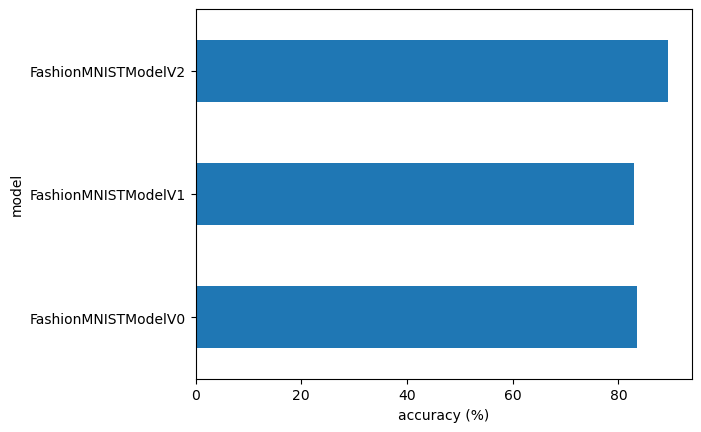

In [47]:
# Visualize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel("accuracy (%)")
plt.ylabel('model')

## 9. Make & Evaluate random predictions with Best Model

In [48]:
def make_predictions(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            
            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)
            
            # Logit -> Prediction prob
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            
            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu() )
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [49]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [50]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9 ):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

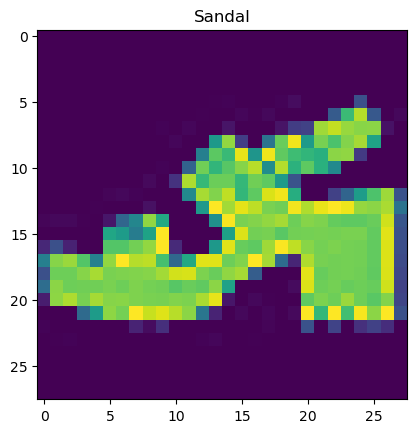

In [51]:
plt.imshow(test_samples[0].squeeze())
plt.title(class_names[test_labels[0]])

In [52]:
# Make predictions
pred_probs = make_predictions(model=model_2, data=test_samples)

# View first 2 prediction probabilities
pred_probs[:2]

tensor([[1.6908e-17, 4.7773e-13, 2.6480e-10, 1.1874e-18, 7.2738e-16, 1.0000e+00,
         9.8369e-16, 2.1539e-11, 1.7993e-12, 5.5444e-10],
        [4.9896e-01, 3.0936e-02, 2.3589e-01, 6.1132e-04, 3.0497e-02, 1.7457e-06,
         8.6395e-02, 5.2784e-09, 1.1671e-01, 1.1485e-07]])

In [53]:
# Convert prediction prob to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 0, 7, 2, 3, 0, 4, 7, 1])

In [54]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

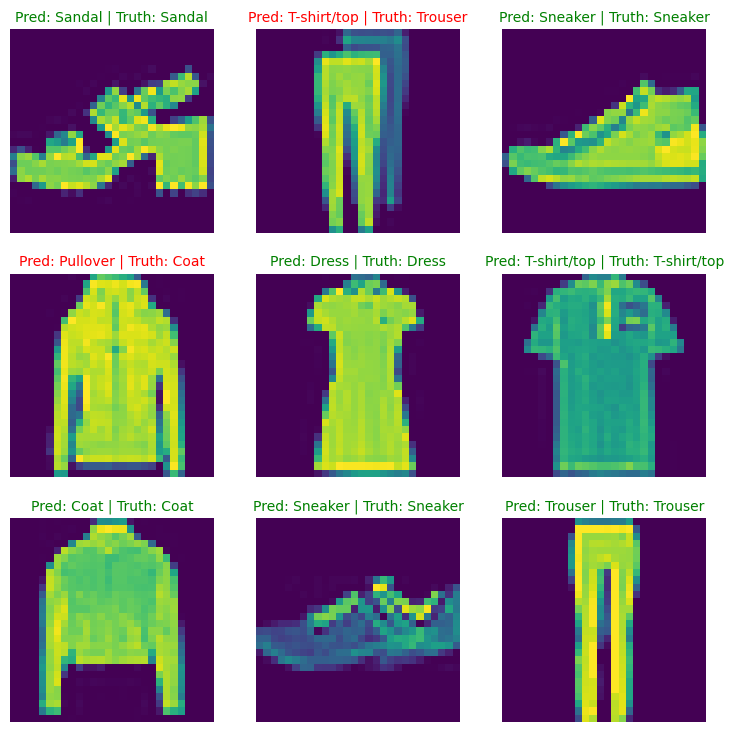

In [55]:
# plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot 
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze())
    
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    
    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    
    # Check for equality btw pred & truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')
        
    plt.axis(False)

## 10. Making a Confusion Matrix for Further Prediction Evaluation

A confusion matrix is a fantastic way of evaluating your classification models

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [56]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        X, y = X.to(device), y.to(device)
        # Forward pass
        y_logit = model_2(X)
        # Turn pred from logits -> pred prob -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())
        
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...: 100%|██████████| 313/313 [00:00<00:00, 413.52it/s]


tensor([9, 2, 1,  ..., 8, 1, 0])

In [57]:
import mlxtend
mlxtend.__version__

'0.23.3'

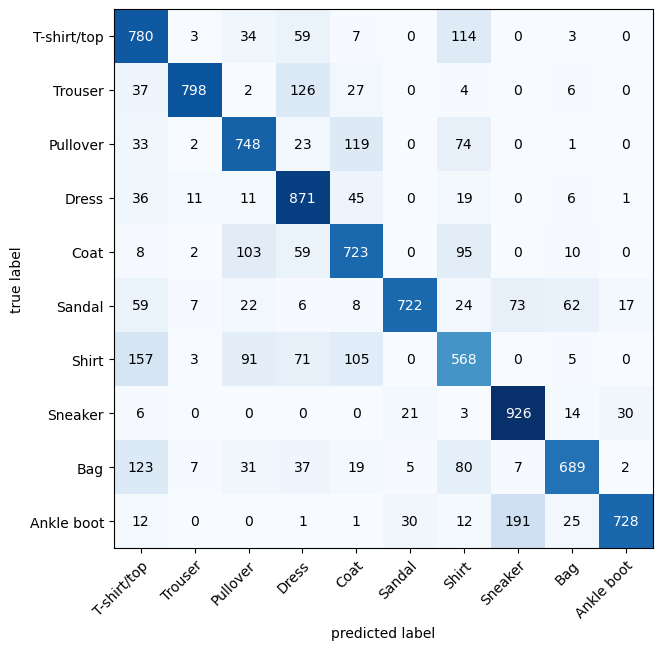

In [61]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup Confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# 3. Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

## 11. Save & Load Best Performing Model

In [63]:
from pathlib import Path

# Create model directory path
Model_Path = Path("Models")
Model_Path.mkdir(parents=True, exist_ok=True)

# Create model save
Model_name = '03_pytorch_cv_model_2.pth'
Model_save_path = Model_Path / Model_name

# Save the model state dict
print(f"Saving model to: {Model_save_path}")
torch.save(obj=model_2.state_dict(),
           f=Model_save_path)

Saving model to: Models\03_pytorch_cv_model_2.pth


In [67]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10,output_shape=len(class_names))

# load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=Model_save_path))

# Send the model to target device
loaded_model_2.to(device)



FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [68]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3292537331581116,
 'model_acc': 89.3570287539936}

In [69]:
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3292537331581116,
 'model_acc': 89.3570287539936}

In [71]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']) )

tensor(True)